In [1]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
from rdkit.Chem import rdDepictor
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.molSize = (350, 350)
IPythonConsole.drawOptions.addAtomIndices = True
from openchemie import OpenChemIE
from PIL import Image
import numpy as np
from rdkit.Chem import AllChem
import cv2
import re
import torch
from openchemie import utils

import json

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = OpenChemIE(device = torch.device('cuda'))

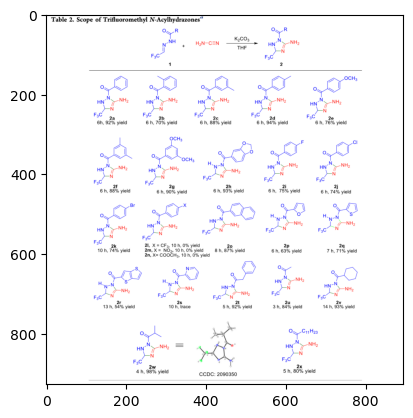

In [3]:
file_name = 'acs.joc.2c00176 example 1.png'

image_file = '../data/' + file_name

image = Image.open(image_file)

image_np = np.array(image)

plt.imshow(image_np)
plt.show()

In [4]:
results = model.extract_reactions_from_figures([image_np])

coref_results = model.extract_molecule_corefs_from_figures([image_np])

/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/Mounts/rbg-storage1/users/urop/vincentf/miniconda3/envs/openchemie/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATe

Inspect the RxnScribe Outputs

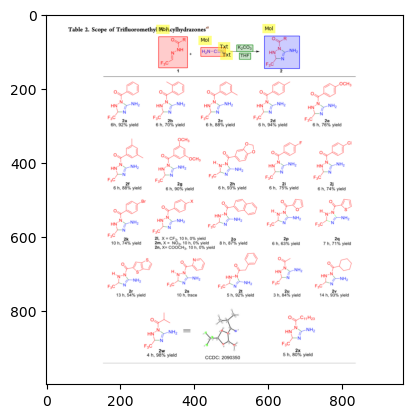

In [5]:
output = model.rxnscribe.draw_predictions(results[0]['reactions'], image_file = image_file)
plt.imshow(output[0])

{'Cc1cc(C)cc(C(=O)N2NC(C(F)(F)F)N=C2N)c1': ['2f', '6 h, 88%'], 'NC1=NC(C(F)(F)F)NN1C(=O)c1ccc(Br)cc1': ['2k', '10 h, 74% yield'], 'NC1=NC(C(F)(F)F)NN1C(=O)c1ccccc1': ['2a'], '[H]N1C(C(F)(F)F)N=C(N)N1C(=O)c1cc2sccc2s1': ['2r', '13 h, 549 yiold'], 'CC(C)C(=O)N1NC(C(F)(F)F)N=C1N': ['Zw', '4 h, 98% yield'], 'Cc1ccccc1C(=O)N1NC(C(F)(F)F)N=C1N': ['2b', '6 h; 70% yield'], '*c1ccc(C(=O)N2NC(C(F)(F)F)N=C2N)cc1': ['21, X= CF3 10 h, 0% yield', 'Zm,X =', '10 h, 0% yield', 'X= COOCH3: 10 h, 0% yield', 'NOz', '2n,'], 'COc1cc(OC)cc(C(=O)N2NC(C(F)(F)F)N=C2N)c1': ['2g', '6 h, 90% yield'], '*C(=O)NN=CC(F)(F)F': [], '[H]N1C(C(F)(F)F)N=C(N)N1C(=O)c1ccccn1': ['25', '10 h, trace'], 'Cc1cccc(C(=O)N2NC(C(F)(F)F)N=C2N)c1': ['2c', '6 h, 88% yield'], 'C[C@@H]([C@H]1C(=O)[C@@H]([Si](C)C)C[C@@H]1C(=O)O)[C@H](C(=O)O)C(O)(O)O': ['CCDC: 2090350'], 'NC1=NC(C(F)(F)F)NN1C(=O)C1=CC2=CCC=CC=2C=C1': ['20', '8 h, 87% yield'], '[H]N1C(C(F)(F)F)N=C(N)N1C(=O)c1ccc2c(c1)OCO2': ['2h', '6 h, 93% yield'], 'NC1=NC(C(F)(F)F)NN1C(=O)

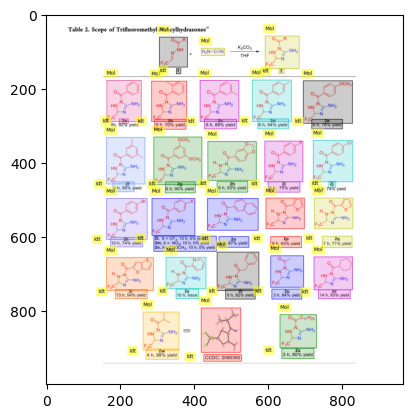

In [6]:
coref_output = model.moldet.draw_bboxes(coref_results[0], image_file = image_file, coref = True)

plt.imshow(coref_output[0])

coref_results_dict = {coref_results[0]['bboxes'][coref[0]]['smiles']: coref_results[0]['bboxes'][coref[1]]['text']  for coref in coref_results[0]['corefs']}

print(coref_results_dict)

*C(=O)NN=CC(F)(F)F


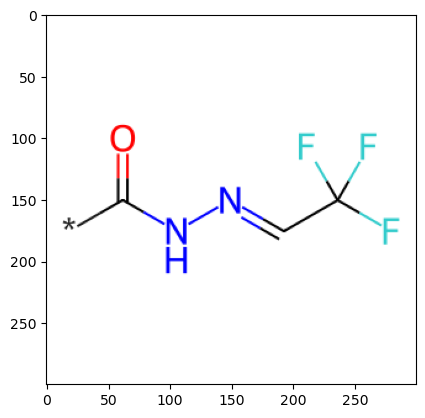

N#CN


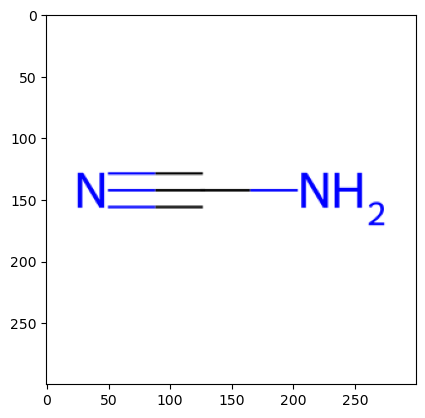

*C(=O)N1NC(C(F)(F)F)N=C1N


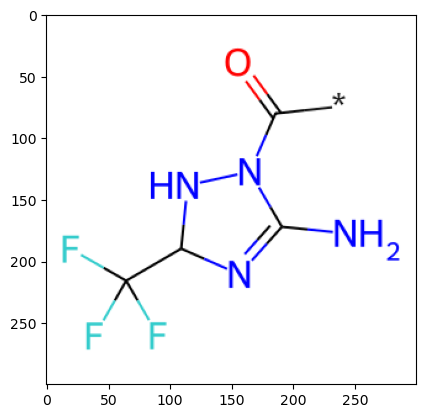

In [7]:
reactants = []
products = []

for reactant in results[0]['reactions'][0]['reactants']:
    print(reactant['smiles'])
    reactants.append(reactant['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(reactant['smiles']))
    plt.imshow(i)
    plt.show()
for product in results[0]['reactions'][0]['products']:
    print(product['smiles'])
    products.append(product['smiles'])
    i = Draw.MolToImage(Chem.MolFromSmiles(product['smiles']))
    plt.imshow(i)
    plt.show()

backout the reactants and do manual evaluation

In [8]:
backed_out = utils.backout(results, coref_results, model.molscribe)

these are the predicted reactants corresponding the product with label 2f
Cc1cc(C)cc(C(=O)NN=CC(F)(F)F)c1


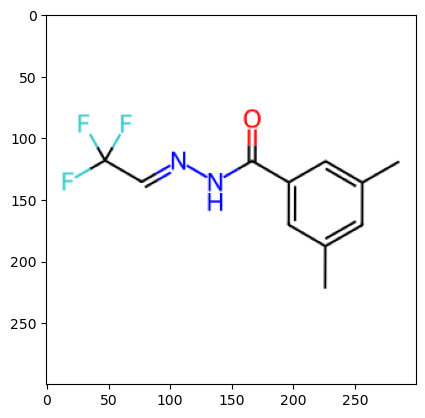

N#CN


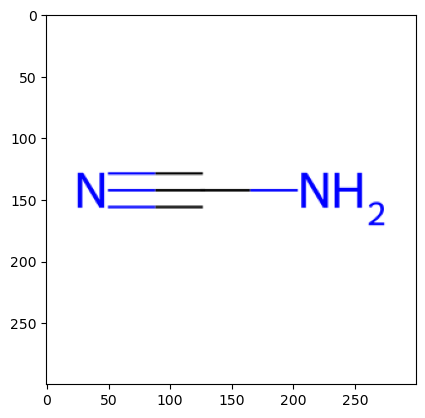

these are the predicted reactants corresponding the product with label 2k
O=C(NN=CC(F)(F)F)c1ccc(Br)cc1


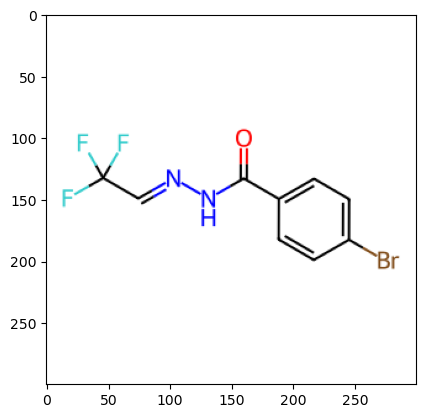

N#CN


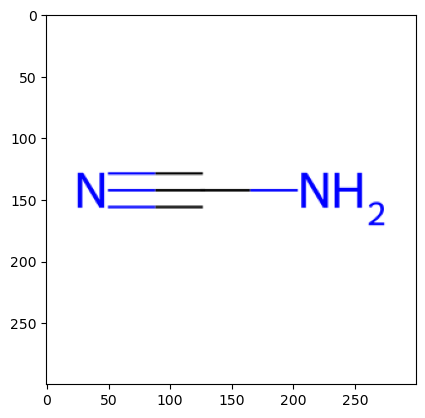

these are the predicted reactants corresponding the product with label 2a
O=C(NN=CC(F)(F)F)c1ccccc1


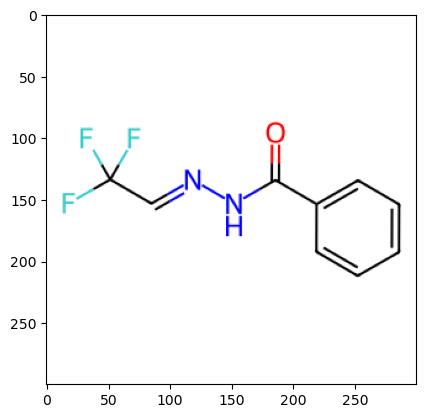

N#CN


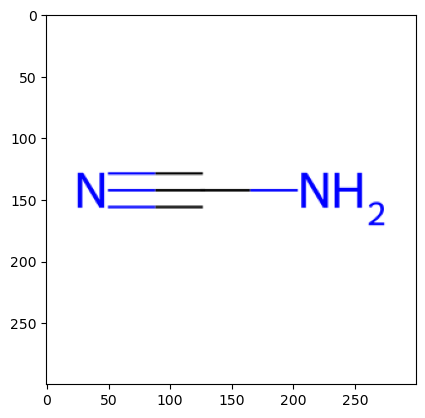

these are the predicted reactants corresponding the product with label 2r
O=C(NN=CC(F)(F)F)c1cc2sccc2s1


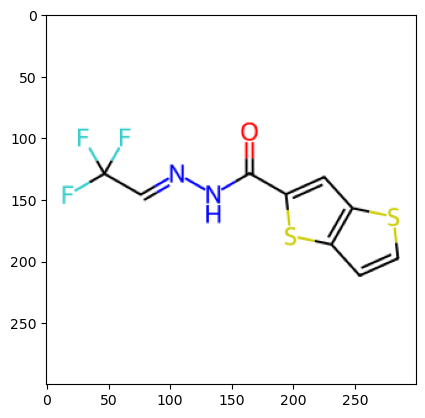

N#CN


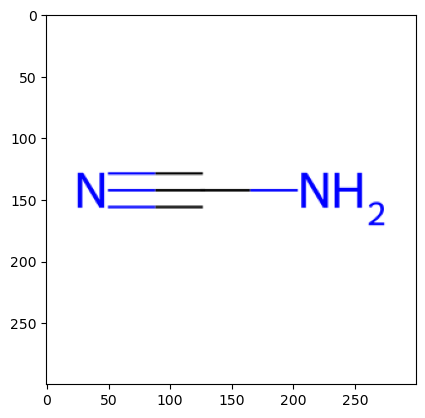

these are the predicted reactants corresponding the product with label 2b
Cc1ccccc1C(=O)NN=CC(F)(F)F


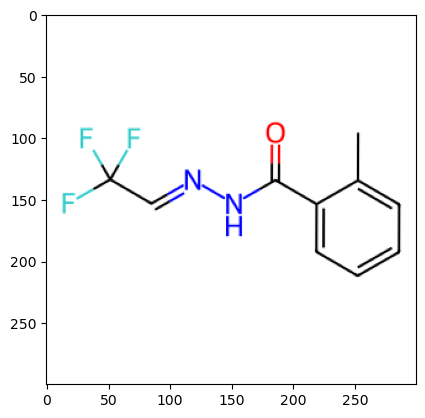

N#CN


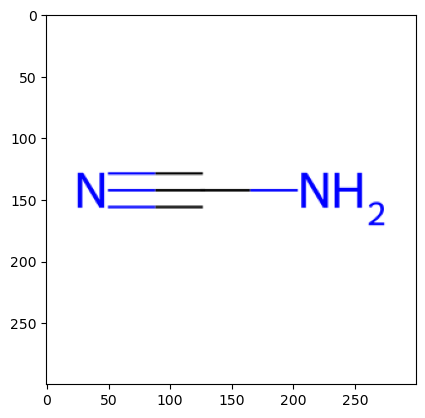

these are the predicted reactants corresponding the product with label 2n,
*c1ccc(C(=O)NN=CC(F)(F)F)cc1


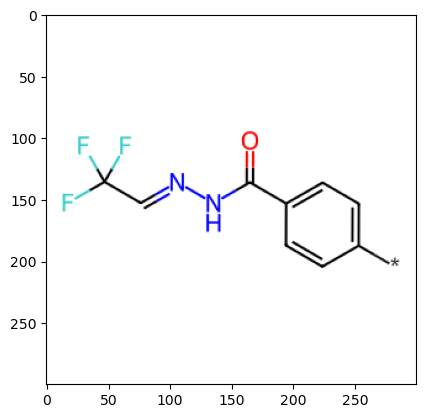

N#CN


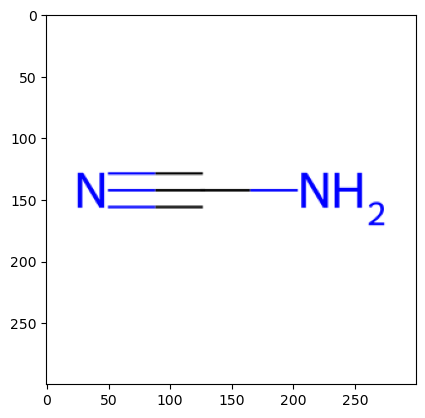

these are the predicted reactants corresponding the product with label 2g
COc1cc(OC)cc(C(=O)NN=CC(F)(F)F)c1


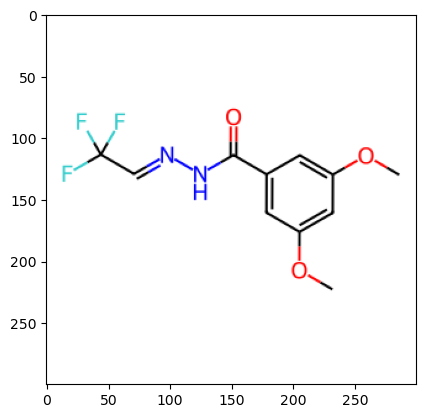

N#CN


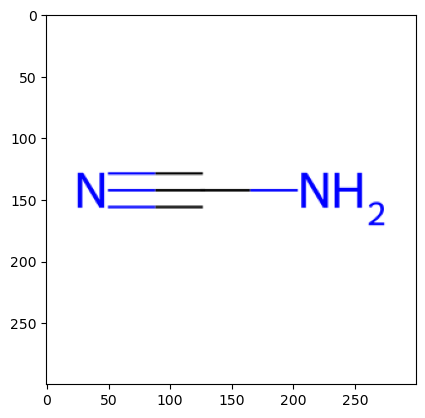

these are the predicted reactants corresponding the product with label 2c
Cc1cccc(C(=O)NN=CC(F)(F)F)c1


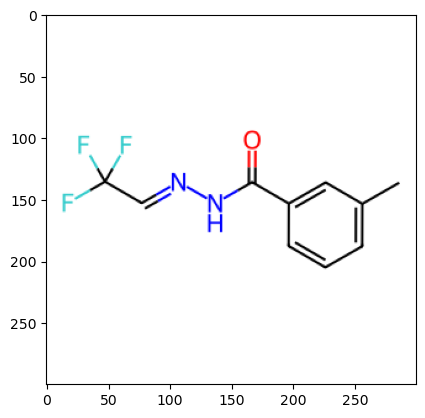

N#CN


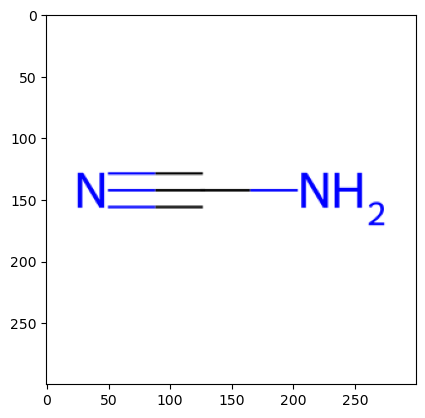

these are the predicted reactants corresponding the product with label 2h
O=C(NN=CC(F)(F)F)c1ccc2c(c1)OCO2


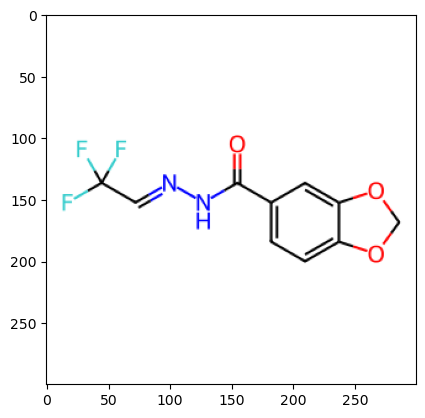

N#CN


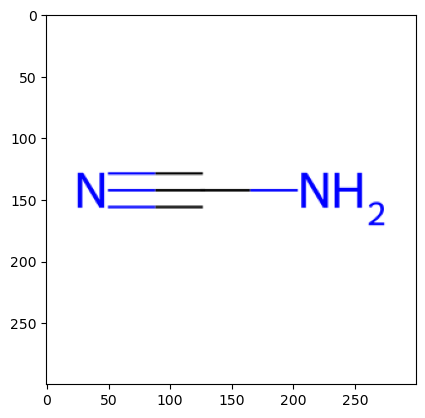

these are the predicted reactants corresponding the product with label 2t
O=C(Cc1ccccc1)NN=CC(F)(F)F


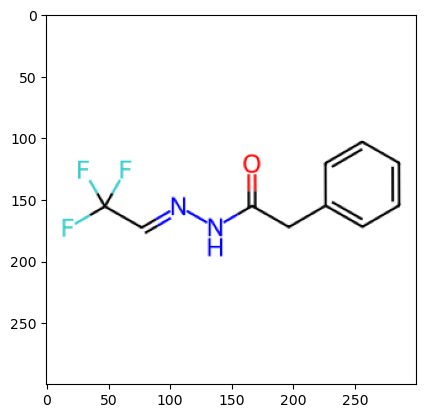

N#CN


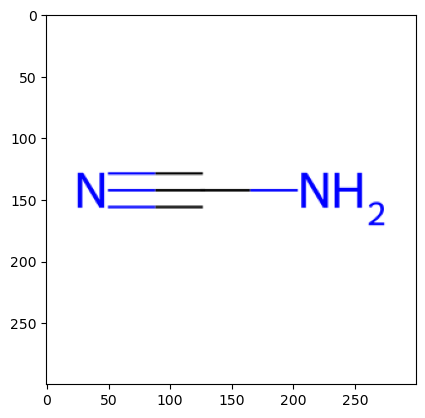

these are the predicted reactants corresponding the product with label 2d
Cc1ccc(C(=O)NN=CC(F)(F)F)cc1


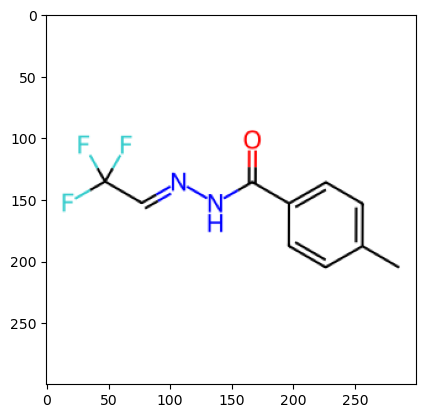

N#CN


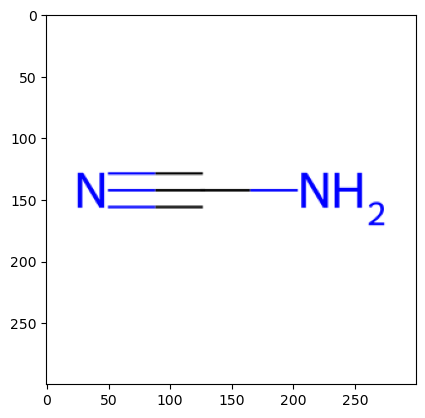

these are the predicted reactants corresponding the product with label 2i
O=C(NN=CC(F)(F)F)c1ccc(F)cc1


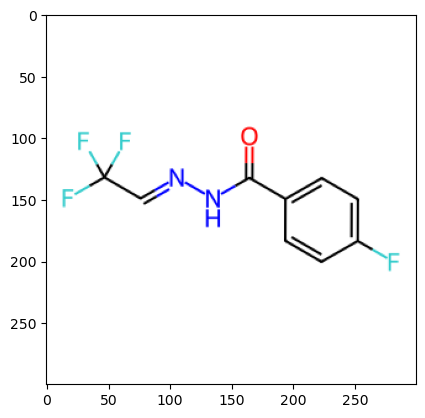

N#CN


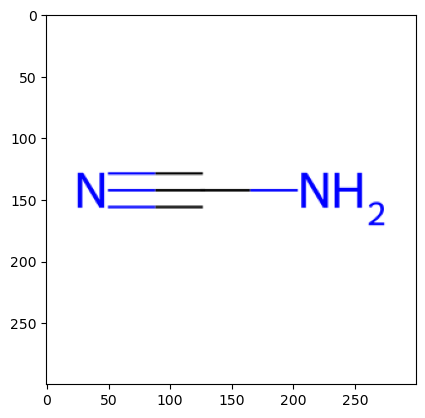

these are the predicted reactants corresponding the product with label 2p
O=C(NN=CC(F)(F)F)c1ccco1


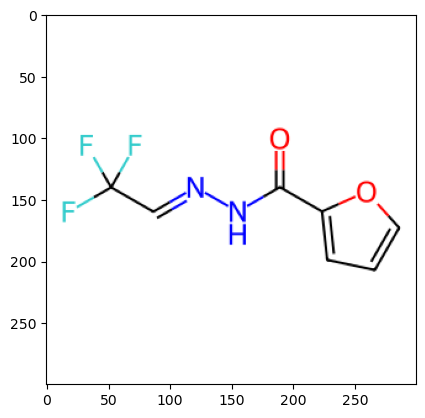

N#CN


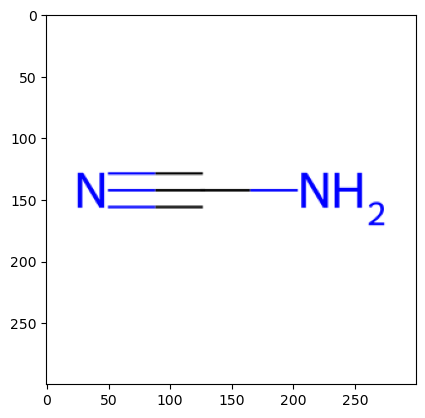

these are the predicted reactants corresponding the product with label 2u
CC(=O)NN=CC(F)(F)F


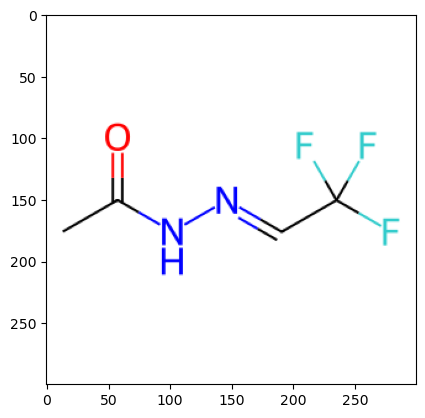

N#CN


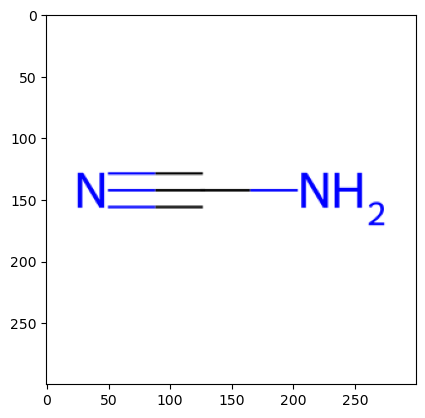

these are the predicted reactants corresponding the product with label 2x
[CH2]C#CC#CC#CC#CC#CC#CC#CC#CC(=O)NN=CC(F)(F)F


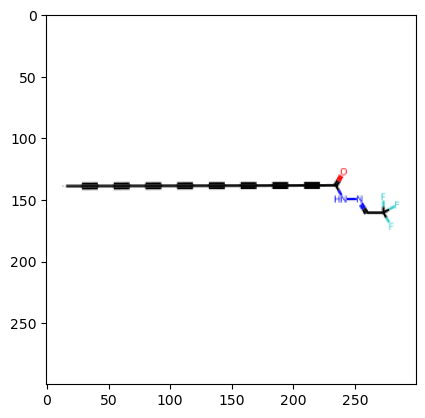

N#CN


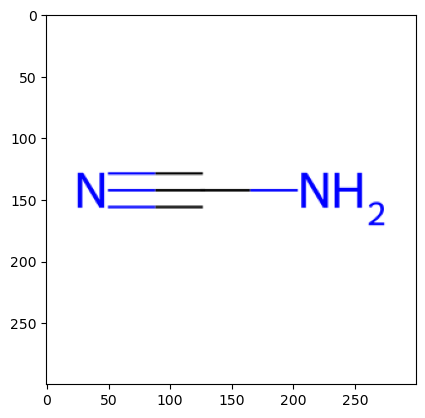

these are the predicted reactants corresponding the product with label 2e
COc1ccc(C(=O)NN=CC(F)(F)F)cc1


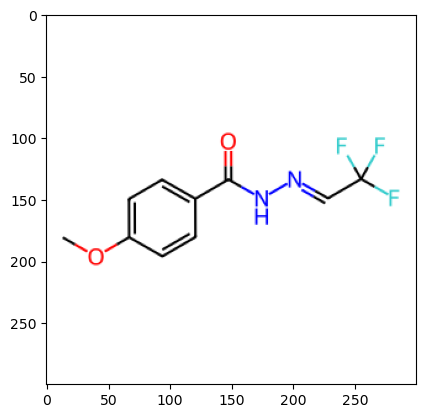

N#CN


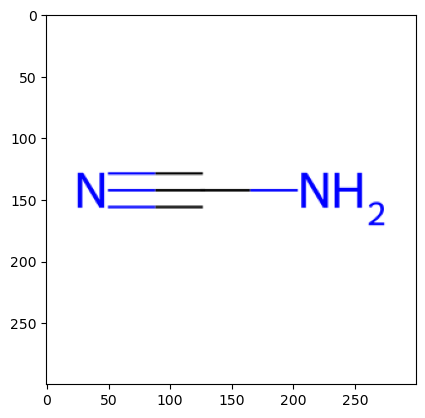

these are the predicted reactants corresponding the product with label 2j
O=C(NN=CC(F)(F)F)c1ccc(Cl)cc1


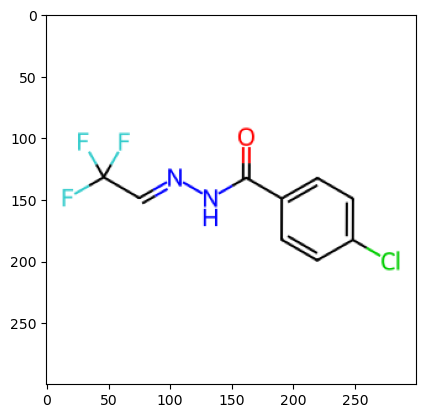

N#CN


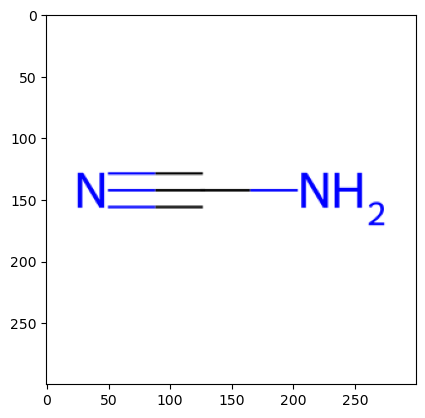

these are the predicted reactants corresponding the product with label 2q
O=C(NN=CC(F)(F)F)c1cccs1


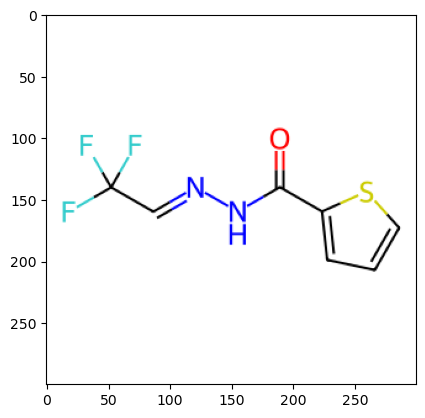

N#CN


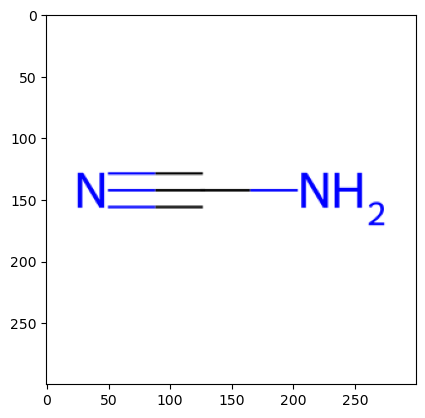

In [9]:
extracted_reactants = {}

for reactants, label in backed_out:
    print(f'these are the predicted reactants corresponding the product with label {label}')
    extracted_reactants[label] = []
    for molecule in reactants:
        print(molecule)
        extracted_reactants[label].append(molecule)
        i = Draw.MolToImage(Chem.MolFromSmiles(molecule))
        plt.imshow(i)
        plt.show()

backout results:

2a yes
2b yes
2c yes
2d yes
2e yes
2f yes
2g yes
2h yes
2i yes
2j yes
2k yes
2l, m, n substitution correct, cannot substitute X
2o
2p yes
2q yes
2r yes
2s
2t yes
2u yes
2v
2w
2x wrong (molscribe error)

precision: 16/24 recall: 16/18